### This notebook aims to help people to understand and interpret tree models , how some variables affect target etc.

In [1]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [2]:
### insert data and get sample rows from it
data = pd.read_csv('heart.csv')
data.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
18,43,1,0,150,247,0,1,171,0,1.5,2,0,2,1
199,65,1,0,110,248,0,0,158,0,0.6,2,2,1,0
156,47,1,2,130,253,0,1,179,0,0.0,2,0,2,1
139,64,1,0,128,263,0,1,105,1,0.2,1,1,3,1
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2,1


In [3]:
### define dependent and independent variables
X = data.drop('target', axis = 1)
y = data['target']

##### Creating Model

In [4]:
model = XGBClassifier() ### creating instance
model.fit(X, y) ## fitting data into model. note: normally we should split data into training and testing frames !!!

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [5]:
accuracy_score(y, model.predict(X))

0.976897689768977

model is given, let's interpret it

One method can be plotting tree schema to see which variables affects our target, seeing leaf values (coefficients) etc. . Plotting tree is very limited and as in this example it's limited only with XGBoost Classifier or with some other types of tree algorithms

In [6]:
from xgboost import plot_tree
import matplotlib.pyplot as plt
%matplotlib inline

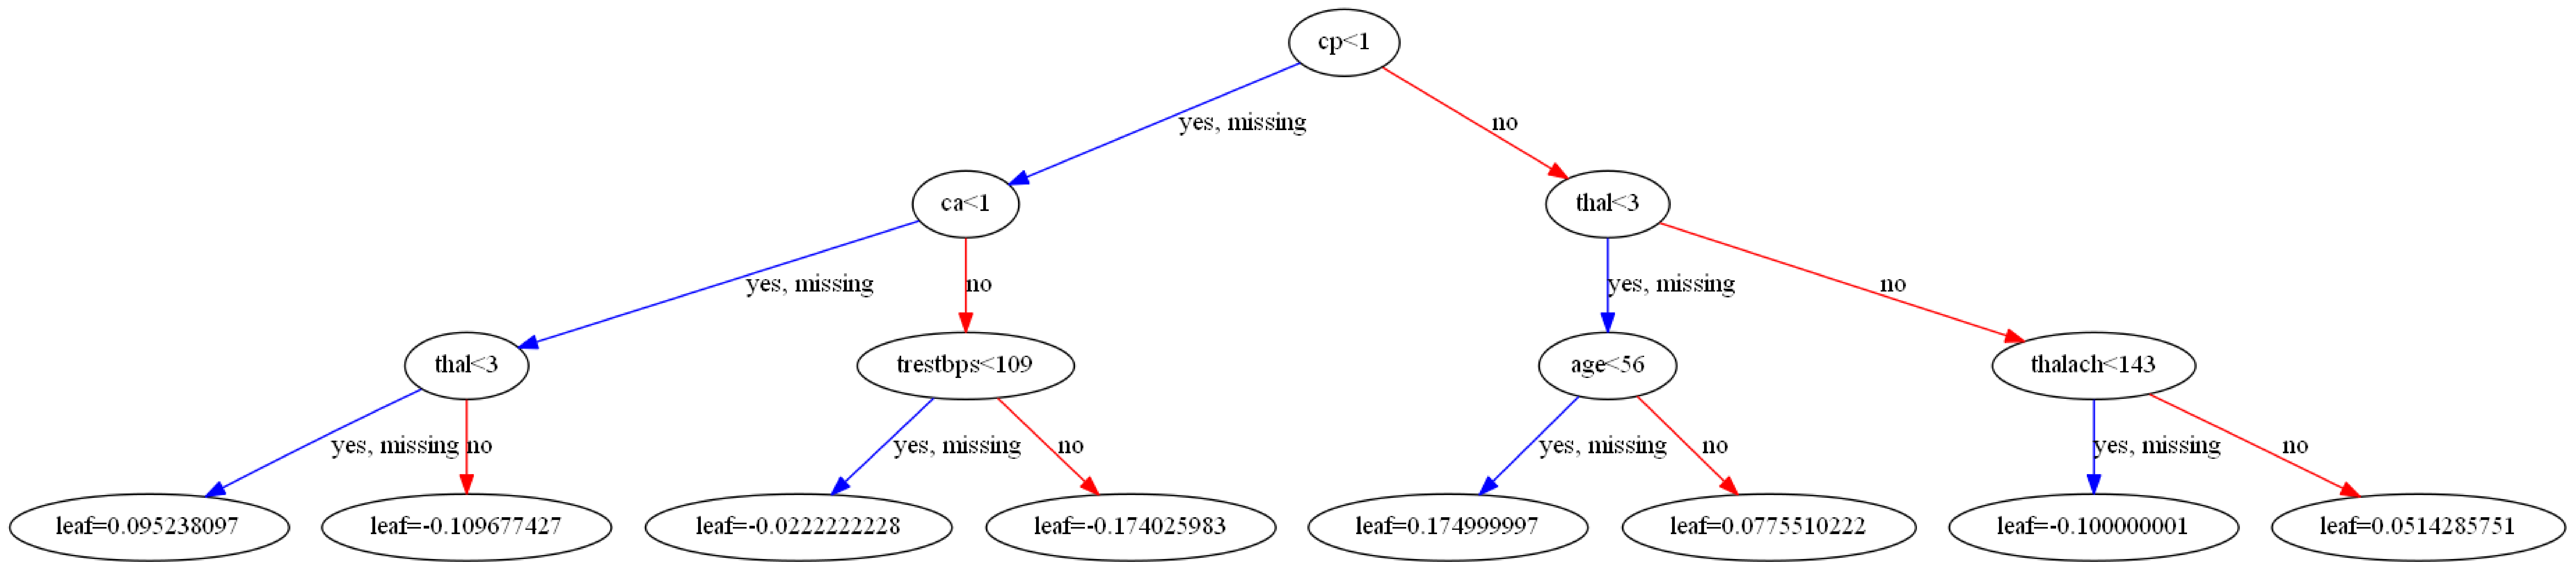

In [7]:
plot_tree(model)
fig = plt.gcf()
fig.set_size_inches(150, 100)

#### Another and useful method can be using <b>Partial dependence plots</b>

In [8]:
from sklearn.inspection import plot_partial_dependence
from sklearn.tree import DecisionTreeClassifier

C:\Users\User\Anaconda3\lib\site-packages\sklearn\inspection\partial_dependence.py:658: UserWarning: Attempting to set identical bottom == top == 0.5445544554455446 results in singular transformations; automatically expanding.
  ax.set_ylim(pdp_lim[1])


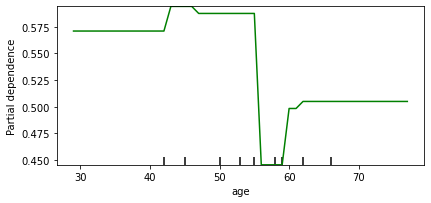

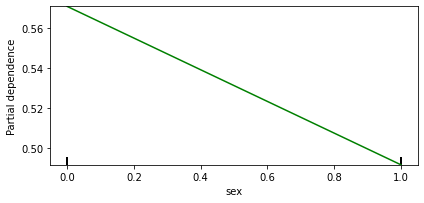

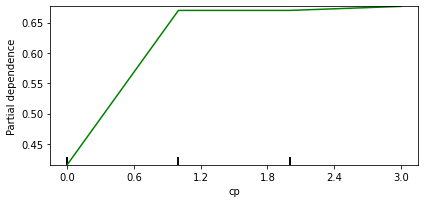

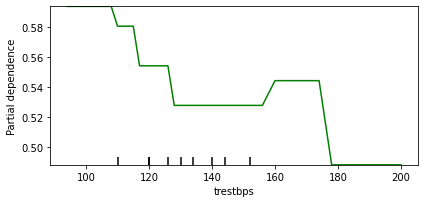

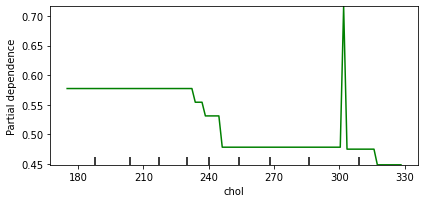

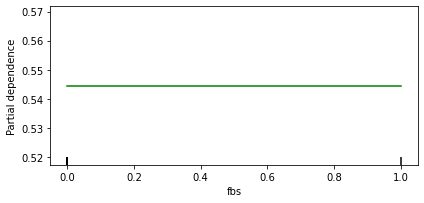

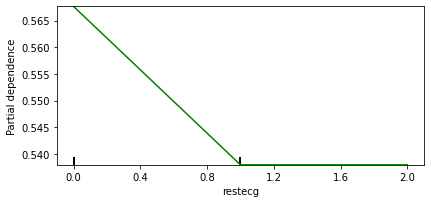

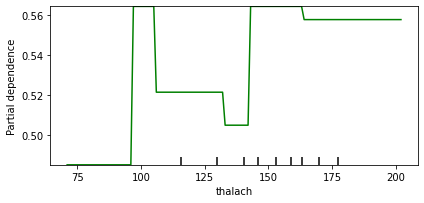

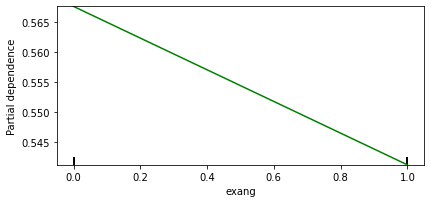

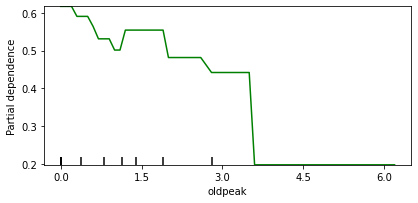

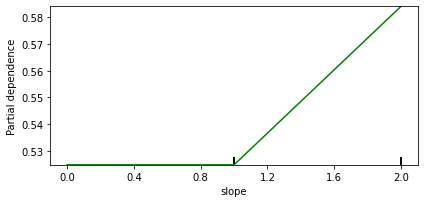

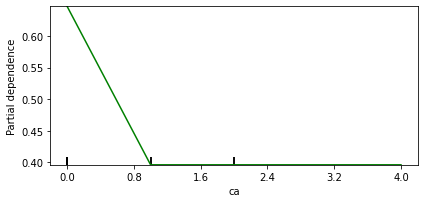

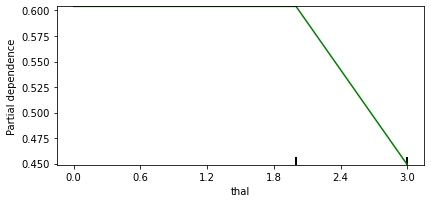

In [9]:
model2 = DecisionTreeClassifier()
model2.fit(X, y)
#features = [0, 1]
for i in range(len(X.columns)):
    plot_partial_dependence(model2, X, [i], feature_names=X.columns)
#     plt.xlabel = X.columns[i]

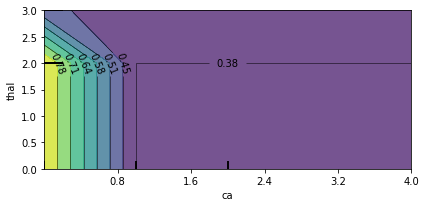

In [10]:
## you can also use 2 variables to see where probability is high/low
plot_partial_dependence(model2, X, [(11,12)], feature_names=X.columns)

##### to see the importance of variables for model:
note: `feature_imporances_` is only avaliable in some models, in our case, in these tree models

In [11]:
pd.DataFrame({'Columns':X.columns,
              'Feature Importances':model.feature_importances_}).sort_values('Feature Importances', ascending = False)

,Columns,Feature Importances
2,cp,0.218700
12,thal,0.189140
11,ca,0.114083
8,exang,0.092784
9,oldpeak,0.072386
10,slope,0.057370
1,sex,0.053994
0,age,0.042060
6,restecg,0.036758
7,thalach,0.035913


In [12]:
pd.DataFrame({'Columns':X.columns,
              'Feature Importances':model2.feature_importances_}).sort_values('Feature Importances', ascending = False)

,Columns,Feature Importances
2,cp,0.270263
11,ca,0.139477
12,thal,0.112727
4,chol,0.106211
9,oldpeak,0.104744
3,trestbps,0.059719
0,age,0.059188
7,thalach,0.053307
1,sex,0.029104
10,slope,0.026202
